# Notebook 2 - Design of inhibitors against histamine H1 receptor

By Vincent Blay, June 2021

In this notebook, we demonstrate the use of Macaw embeddings to model binding affinity to a protein receptor of pharmacological interest. Macaw embeddings are then applied to identify promising candidate molecules among a custom virtual library.

In [18]:
pwd

'C:\\Users\\Enka\\Desktop\\LDRD\\macaw_repo\\notebooks'

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVR
from sklearn_rvm import EMRVR

#Needed to show molecules
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 

import macaw
print(macaw.__version__)
from macaw import *

%run "./plotting.py"

0.0.8


## 1. Binding to histamine H1 receptor

### 1.1 Data preparation

In [20]:
df = pd.read_csv("../data/data_H1.csv")
Y = df.pKi
smiles = df.Smiles
df.head()

,ID,compound_id,Smiles,pKi
0,1,CHEMBL3925977,O=C(O)c1ccc2cccnc2c1N1CCN(CCc2ccc(OCCCN3CCCCCC...,5.599999
1,2,CHEMBL2171045,O=C(NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CCC(N2CCC(O...,7.400008
2,3,CHEMBL3753784,COc1ccc(CNc2nc(N3CCN(C)CC3)nc3c2CCc2ccccc2-3)c...,5.200000
3,4,CHEMBL3917794,O=C(O)c1ccc2cccc(N3CCN(CCc4ccc(OCCCN5CCCCCC5)c...,6.599998
4,5,CHEMBL240394,O=C(c1cc(F)cc(F)c1)N1CCN(c2ccc(OCCCN3CCCCC3)cc...,5.700001


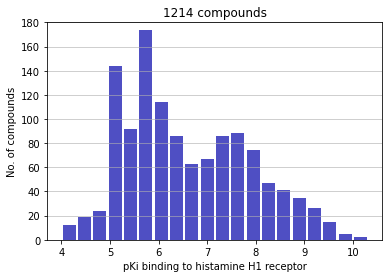

In [21]:
plot_histogram(Y, xlabel="pKi binding to histamine H1 receptor")

In [22]:
smi_train, smi_test, y_train, y_test = train_test_split(smiles, Y, test_size=0.2, random_state=42)

### 1.2 Compute Macaw embeddings

In [23]:
#mcw = Macaw_optimus(smi_train, y_train, fast=False, verbose=True, Y=y_train)
mcw = Macaw(smi_train, edim=15, Nlndmk=50, Y=y_train, fptype='atompairs', metric='sokal')

In [24]:
X_train = mcw.transform()
X_train.shape

(971, 15)

In [25]:
X_test = mcw.transform(smi_test)
X_test.shape

(243, 15)

### 1.3 Modeling using a SVR

In [26]:
for C in [1,3,5,7,10,30,50]:
    regr = SVR(kernel='rbf', C=C, epsilon=.3)
 
    scores = cross_val_score(regr, X_train, y_train, cv = 5)
    print(scores.mean())

0.7052052976747193
0.7244612657081662
0.7248465093178447
0.7242265335535502
0.720604606485957
0.7106421958047571
0.6908108995979654


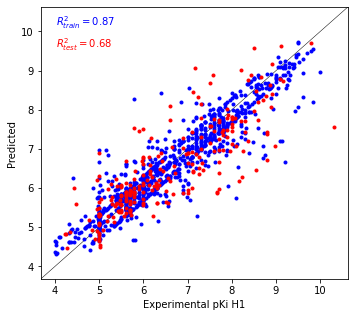

In [27]:
regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train,y=y_train_pred,x_test=y_test,y_test=y_test_pred, 
            xlabel="Experimental pKi H1", savetitle="../data/H1_SVR.png") 

## 2. Binding to muscarinic receptor M2

### 2.1 Data preparation

In [28]:
df = pd.read_csv("../data/data_M2.csv")
Y = df.pKi
smiles = df.Smiles
df.head()

,ID,compound_id,Smiles,pKi
0,1,CHEMBL358493,C[N+]12CCC(CC1)C(O)(c1cc3ccccc3o1)C2,5.259637
1,2,CHEMBL343236,c1ccc2c(c1)CC(C1CN3CCC1CC3)O2,6.309894
2,3,CHEMBL150845,CC(=C1CCN(C2CCN(C(=O)c3ccc(F)c4ccccc34)CC2)CC1...,8.017729
3,4,CHEMBL593871,C[C@H]1OC[C@@H](C[N+](C)(C)C)O[C@@H]1C,4.780000
4,5,CHEMBL91404,CCOC(=O)N1CCC(N2CCC(C(=O)c3ccc(S(=O)(=O)c4ccc5...,9.886057


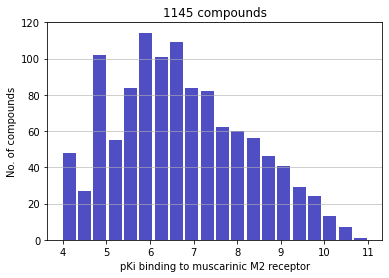

In [29]:
plot_histogram(Y, xlabel="pKi binding to muscarinic M2 receptor")

In [30]:
smi_train, smi_test, y_train, y_test = train_test_split(smiles, Y, test_size = 0.2, random_state = 42)

### 2.2 Compute Macaw embeddings

In [31]:
#mcw2 = Macaw_optimus(smi_train, y_train, fast=False, verbose=True, Y=y_train)
mcw2 = Macaw(smi_train, edim = 15, Nlndmk = 50, Y = y_train, fptype='atompairs', metric='rogot-goldberg')

In [32]:
X_train = mcw2.transform()
X_train.shape

X_test = mcw2.transform(smi_test)
X_test.shape

(229, 15)

### 2.3 Modeling using a SVR

In [33]:
for C in [1,3,5,10,30]:
    regr2 = SVR(kernel='rbf', C=C, epsilon=.5)
 
    scores = cross_val_score(regr2, X_train, y_train, cv = 5)
    print(scores.mean())

0.6749552090160579
0.6932640825889074
0.6939462931260503
0.6912064694256974
0.6720573047259458


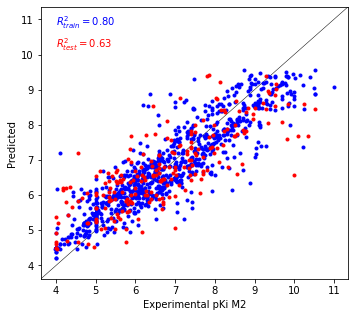

In [34]:
regr2 = SVR(kernel='rbf', C=3, epsilon=.5)
regr2.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr2.predict(X_train)

# Test set predictions
y_test_pred = regr2.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred, 
            xlabel="Experimental pKi M2", savetitle="../data/M2_SVR.png")

## 3. Discovery of new hits specific to H1

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` and `regr2` above, which use 15-D Macaw embeddings as their input. The custom library ("LibraryVB.csv") is a custom library compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted binding affinity to the H1 receptor and comparatively low predicted binding affinity to the M2 receptor.

In [35]:
mylib = pd.read_csv("../data/LibraryVB.csv")
print(mylib.shape)
mylib.head()

(19490, 2)


,Smiles,Source
0,NC(=O)NC(=O)Cn1c(=O)c(C#N)cn(C2CC2)c1=O,Enamine_antivirals
1,CC(C)CNC(=O)Cn1c(=O)c(C#N)cn(C2CC2)c1=O,Enamine_antivirals
2,O=C(Cn1cccnc1=O)NC1CCCCCC1,Enamine_antivirals
3,CCC(=O)Nc1ccc(cn1)N1CCOCC1,Enamine_antivirals
4,Cc1nn(C)c(C)c1CC(=O)NC(C1CC1)C1CC1,Enamine_antivirals


In [36]:
smi_lib = mylib.Smiles

In [37]:
X1_lib = mcw.transform(smi_lib)

Y1_lib_pred = regr.predict(X1_lib)

In [38]:
X2_lib = mcw2.transform(smi_lib)

Y2_lib_pred = regr2.predict(X2_lib)

Let us represent the predictions of both models:

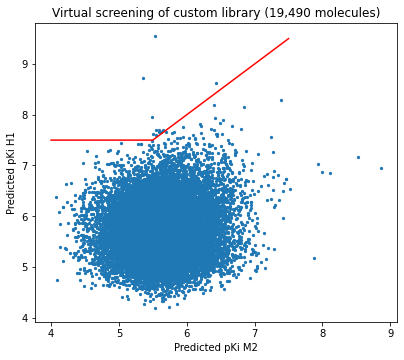

In [39]:
plt.figure(figsize=(6.5,5.5))
plt.scatter(x=Y2_lib_pred,y=Y1_lib_pred,s=5) 
plt.xlabel("Predicted pKi M2")
plt.ylabel("Predicted pKi H1")
plt.title("Virtual screening of custom library (19,490 molecules)")
plt.plot([4,5.5,7.5],[7.5,7.5,9.5],c='red')
plt.savefig("../data/H1_library_screening.png")

Let us have a look at the compounds:

In [40]:
indx = np.where((Y1_lib_pred > 7.5)*(Y1_lib_pred > (Y2_lib_pred + 2)))[0]

In [41]:
lead_df = mylib.iloc[indx].copy()
lead_df['pKi_H1_pred'] = Y1_lib_pred[indx]
lead_df['pKi_M2_pred'] = Y2_lib_pred[indx]

lead_df

,Smiles,Source,pKi_H1_pred,pKi_M2_pred
3508,NC(=O)C1(O)CCCN(C1)C(=O)c1ccccc1Oc1ccccc1,Enamine_DDS318,7.624399,5.498562
3784,OC(=O)c1ccc(CNC(=O)C2CCCc3ccccc23)s1,Enamine_DDS594,7.707283,5.649499
6496,OC(=O)CCC1CN(C(=O)c2ccsc2)c2ccccc2C1,Enamine_DDS3306,7.655657,5.595675
13946,CN(C)CC/C=C\1/c2ccccc2COc2ccccc12,Enamine_Phenotypic,9.543390,5.525129
16494,Fc1cccc(c1)C(=O)NC1CCCc2ccccc12,Enamine_Phenotypic,7.697833,5.595862
17177,CC1(C)CC(=O)C2=C(C1)Nc1ccccc1NC2c1ccccc1,Enamine_Phenotypic,7.702363,5.540685
17195,FC(F)(F)c1cccc(NC(=O)C(OC(=O)C2CCCCC2)c2ccccc2)c1,Enamine_Phenotypic,7.668292,5.619769
17440,NC(=O)C1CCN(CC1)C(=O)c1ccc(cc1)c1ccccc1,Enamine_Phenotypic,7.600435,5.549242
19111,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc12,Enamine_Phenotypic,8.626721,6.423538
19235,OCCNCCN1C(=O)c2cccc3cccc(C1=O)c23,Enamine_Phenotypic,7.945552,5.488854


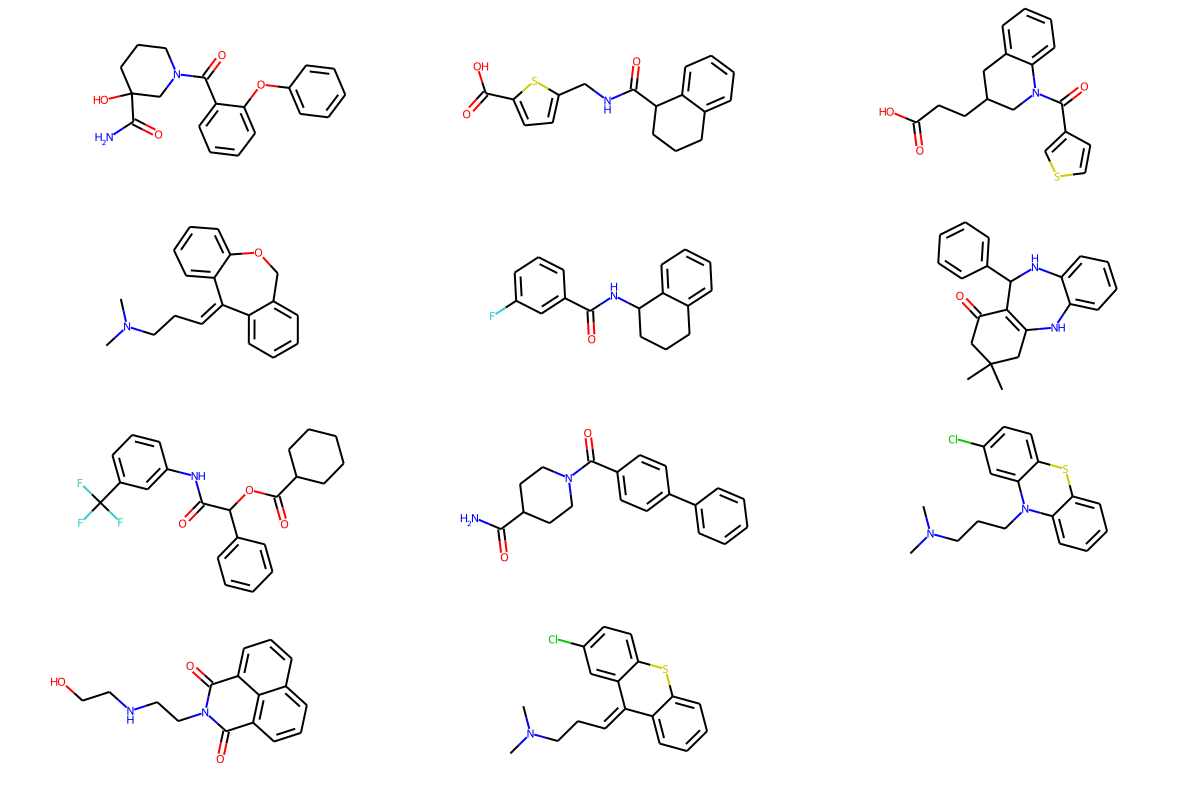

In [53]:
molecules = [Chem.MolFromSmiles(smi) for smi in lead_df.Smiles[:50]]

Draw.MolsToGridImage(molecules, subImgSize=(400,200))